## CHAPTER 2
---
# CONSTRUCTING A CLASSIFIER

---
### Introduction
- **Classification:** the process of using the characteristics of data to separate it into a certain number of classes
- A supervised learning classifier builds a model using labeled training data and then uses this model to classify unknown data
- Classification can be either binary, separating data into two classes, or  multi-class, separating data into more than two classes

## 2.1 Building a Simple Classifier
- The goal of a classifier is to establish the classification criterion to maximize performance. 
- Its performance is measured by evaluating the capacity for generalization. 
- Generalization means attributing the correct class to each new experimental observation. 
- Let's learn how to build a simple classifier

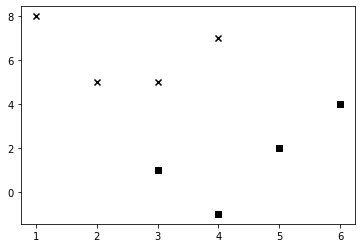

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])

# assign some labels to these points
y = [0, 1, 1, 0, 0, 1, 1, 0]

# separate data into two classes based on the labels
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

# plot the data to explore
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.show()

- This is a scatterplot, where we use squares and crosses to plot the points. 
- The marker parameter specifies the shape you want to use. 
- We used squares to denote points in class_0 and crosses to denote points in class_1.
- Let's draw a line in between the datapoints

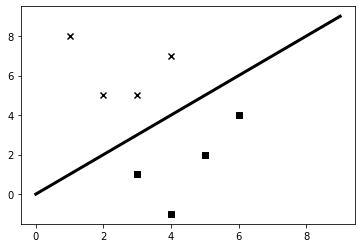

In [2]:
# create a separating line
line_x = range(10)
line_y = line_x

# visualize again
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.plot(line_x, line_y, color='black', linewidth=3)
plt.show()


- We built a simple classifier using the following rule—the input point (a, b) belongs to class_0 if a is greater than or equal to b; otherwise, it belongs to class_1. 
- Inspecting the points one by one, leads to this conclusion. 
- That's it! We just built a linear classifier that can classify unknown data. 
- It's a linear classifier because the separating line is a straight line. 
- If it's a curve, then it becomes a nonlinear classifier.

## 2.2 Building a Logistic Regression Classifier
- Despite the word regression being present in the name, logistic regression is actually used for classification purposes. 
- Logistic regression is a non-linear regression model used when the dependent variable is dichotomous. 
- The purpose is to establish the probability with which an observation can generate one or the other value of the dependent variable; it can also be used to classify observations, according to their characteristics, into two categories. 

In [3]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], 
              [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# initialize the logistic regression
classifier = linear_model.LogisticRegression(solver='lbfgs', C=100)

# train the classifier
classifier.fit(X, y)

LogisticRegression(C=100)

- There are a number of input parameters that can be specified for the preceding function, but a couple of important ones are solver and C. 
- The solver parameter specifies the type of solver that the algorithm will use to solve the system of equations. 
- The C parameter controls the regularization strength. A lower value indicates higher regularization strength.
- We want to draw datapoints and boundaries, 
    - first we define the ranges to plot the diagram
    - second, we evaluate the function across a grid of points and plot it

In [4]:
# define data ranges for plotting
x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

# denotes the step size that will be used in the mesh grid
step_size = 0.01

# define the mesh grid
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# compute the classifier output
mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# reshape the array
mesh_output = mesh_output.reshape(x_values.shape)

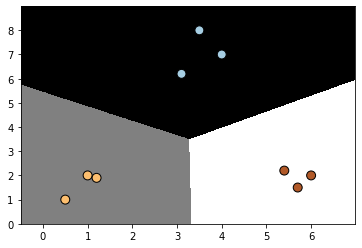

In [5]:
# Plot the output using a colored plot 
plt.figure() 

# choose a color scheme
plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

# Overlay the training points on the plot 
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

# specify the boundaries of the figure
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())

# specify the ticks on the X and Y axes
plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

plt.show()

- Here, plt.scatter plots the points on the 2D graph. 
- X[:, 0] specifies that we should take all the values along the 0 axis (the x axis in our case), and X[:, 1] specifies axis 1 (the y axis). 
- The c=y parameter indicates the color sequence. We use the target labels to map to colors using cmap. 
- Basically, we want different colors that are based on the target labels. Hence, we use y as the mapping. 
- The limits of the display figure are set using plt.xlim and plt.ylim. 
- In order to mark the axes with values, we need to use plt.xticks and plt.yticks. 
- These functions mark the axes with values so that it's easier for us to see where the points are located. 
- In the preceding code, we want the ticks to lie between the minimum and maximum values with a buffer of one unit. 
- Also, we want these ticks to be integers. So, we use the int() function to round off the values.

## 2.3 Building a Naive Bayes classifier
-  A Naive Bayes classifier is a supervised learning classifier that uses Bayes' theorem to build the model.
- The underlying principle of a Bayesian classifier is that some individuals belong to a class of interest with a given probability based on some observations. 
- This probability is based on the assumption that the characteristics observed can be either dependent or independent from one another; in this second case, the Bayesian classifier is called Naive because it assumes that the presence or absence of a particular characteristic in a given class of interest is not related to the presence or absence of other characteristics, greatly simplifying the calculation. 
- Let's go ahead and build a Naive Bayes classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB